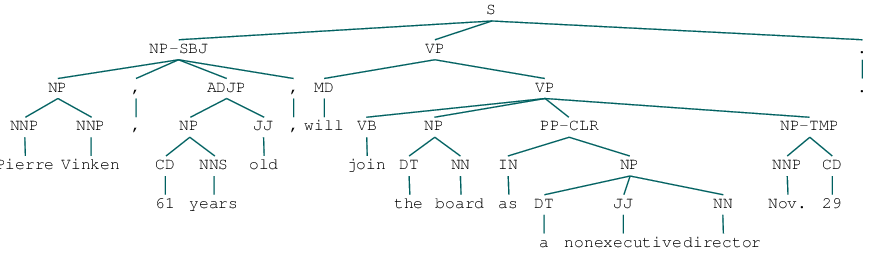

In [17]:
import nltk

nltk.corpus.treebank.parsed_sents('wsj_0001.mrg')[0]

In [19]:
groucho_grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP
    NP -> Det N | Det N PP | 'I'
    VP -> V NP | VP PP
    Det -> 'an' | 'my'
    N -> 'elephant' | 'pajamas'
    V -> 'shot'
    P -> 'in'
    """)

sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [10]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
    'shot' -> 'I' | 'elephant' | 'in'
    'elephant' -> 'an' | 'in'
    'in' -> 'pajamas'
    'pajamas' -> 'my'
    """)

print(groucho_dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


In [15]:
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)

In [16]:
for t in pdp.parse(sent):
    print(t)

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))
